# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [1]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    print(data.files)
    train, test = data['train'], data['test']
for i in train:
    print(i)


['train', 'test']
[3.6000e+01 1.0000e+00 3.9093e-01 1.1025e+00 7.3351e-01 7.2022e-01
 6.9474e-01 1.7954e-01 7.6072e-02 1.0532e+00 5.9213e-02 1.5747e-01
 2.4197e-02 9.5408e-03 2.4731e-04 1.2042e+00]
[5.0000e+00 4.0000e+00 9.3671e-01 2.4151e+00 7.2980e-01 8.1793e-01
 8.6491e-01 3.3439e-01 8.0539e-02 1.1805e+00 4.8722e-02 1.2051e-01
 1.4314e-02 3.9983e-03 3.7216e-04 1.3083e+00]
[2.9000e+01 1.0000e+00 8.3750e-01 1.9512e+00 4.9050e-01 9.6800e-01
 9.8246e-01 6.5138e-01 1.6224e-02 4.7908e-02 5.1195e-03 3.5621e-02
 1.2673e-03 3.2240e-04 1.1238e-05 2.3514e-01]
[3.5000e+01 3.0000e+00 9.0755e-01 2.5820e+00 6.2394e-01 9.6837e-01
 9.9825e-01 5.5674e-01 3.1714e-02 1.8305e-01 7.9387e-02 1.6213e-01
 2.5613e-02 7.4124e-03 6.9878e-04 1.6951e+00]
[3.2000e+01 7.0000e+00 8.8485e-01 2.2398e+00 5.5754e-01 9.7997e-01
 9.9825e-01 6.7974e-01 9.1286e-03 1.5166e-02 2.5658e-02 8.7206e-02
 7.5476e-03 2.1518e-03 1.7873e-04 7.5154e-01]
[2.9000e+01 7.0000e+00 8.4501e-01 2.0918e+00 5.1732e-01 9.4510e-01
 1.0000e+00 6.0

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [29]:
len(test)
len(train)
for i in range(1,41):
    print(f'Probek w klasie {i} jest {sum(train[:,0] == i)}')
"""
Istnieją klasy bez próbek
"""

Probek w klasie 1 jest 77
Probek w klasie 2 jest 66
Probek w klasie 3 jest 55
Probek w klasie 4 jest 66
Probek w klasie 5 jest 77
Probek w klasie 6 jest 44
Probek w klasie 7 jest 44
Probek w klasie 8 jest 33
Probek w klasie 9 jest 121
Probek w klasie 10 jest 88
Probek w klasie 11 jest 88
Probek w klasie 12 jest 77
Probek w klasie 13 jest 99
Probek w klasie 14 jest 66
Probek w klasie 15 jest 66
Probek w klasie 16 jest 0
Probek w klasie 17 jest 0
Probek w klasie 18 jest 0
Probek w klasie 19 jest 0
Probek w klasie 20 jest 0
Probek w klasie 21 jest 0
Probek w klasie 22 jest 121
Probek w klasie 23 jest 77
Probek w klasie 24 jest 77
Probek w klasie 25 jest 66
Probek w klasie 26 jest 99
Probek w klasie 27 jest 55
Probek w klasie 28 jest 66
Probek w klasie 29 jest 110
Probek w klasie 30 jest 77
Probek w klasie 31 jest 77
Probek w klasie 32 jest 66
Probek w klasie 33 jest 66
Probek w klasie 34 jest 99
Probek w klasie 35 jest 88
Probek w klasie 36 jest 33
Probek w klasie 37 jest 0
Probek w klasi

'\nIstnieją klasy bez próbek\n'

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [27]:
# <UZUPEŁNIJ>
# klasy = [3, 5, 7]
# np.isin(train[:,0], klasy )
#train[:,0] == 5) | (train[:,0] == 3) 
train_new = train[(train[:, 0] == 5.0) | (train[:, 0] == 3.0)]
test_new = test[(test[:, 0] == 5.0) | (test[:, 0] == 3.0)]

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje moduł zawieracjący funkcje przydatne do wizualizacji danych z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples): # iteracja po grupach
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
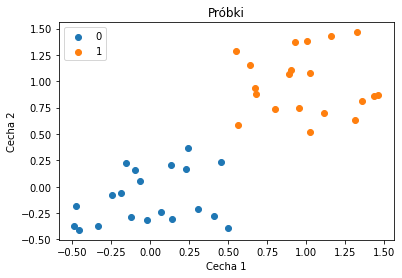

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

(array([3., 5.]), array([55, 77], dtype=int64))


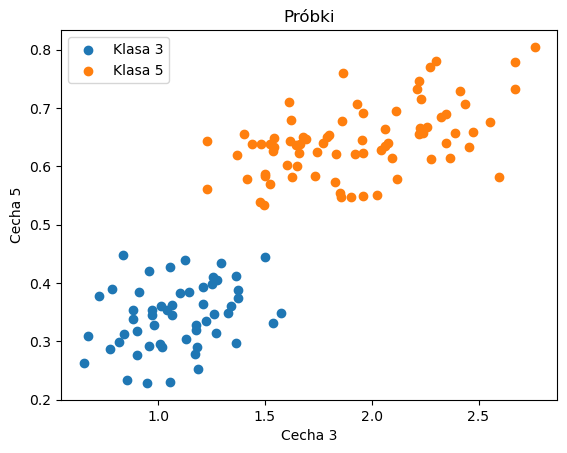

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 3")
plt.ylabel(f"Cecha 5")

train_new_3 = train_new[train_new[:,0] == 3.0]
train_new_5 = train_new[train_new[:,0] == 5.0]
# test_new = test[test[:,0] == 3.0]

probki_kl_3 = train_new_3
probki_kl_5 = train_new_5
print(np.unique(train_new[:, 0], return_counts=True))
X_kl3 = probki_kl_3[:,3]
Y_kl3 = probki_kl_3[:,4]
plt.scatter(X_kl3,Y_kl3,label = 'Klasa 3')

X_kl5 = probki_kl_5[:,3]
Y_kl5 = probki_kl_5[:,4]

plt.scatter(X_kl5, Y_kl5, label = 'Klasa 5')
plt.legend()

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `x` oraz `y` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [18]:
# <UZUPEŁNIJ PONIZEJ>
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

def edist(x, y, features):
    x_values = np.array([x[feature] for feature in features])
    y_values = np.array([y[feature] for feature in features])
    diff = x_values - y_values

   
    distance = np.sqrt(np.sum(diff ** 2))

    return distance

edist(x, y, features) # wynik: 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [ ]:
def knn(train_data, test_data, label, features):
    res = []
    
    for test_point in test_data:
        distance = [edist(test_point, train_point, features) for train_point in train_data]
        low_val = np.argmin(distance)
        res.append(label[low_val])
    return res


### Zadanie 7
Przeprowadź klasyfikację liści wybranych wcześniej (dwóch) klas korzystając z własnej implementacji modelu kNN, a następnie wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

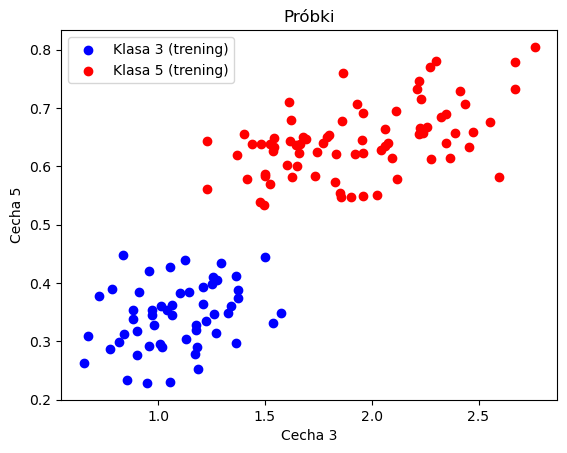

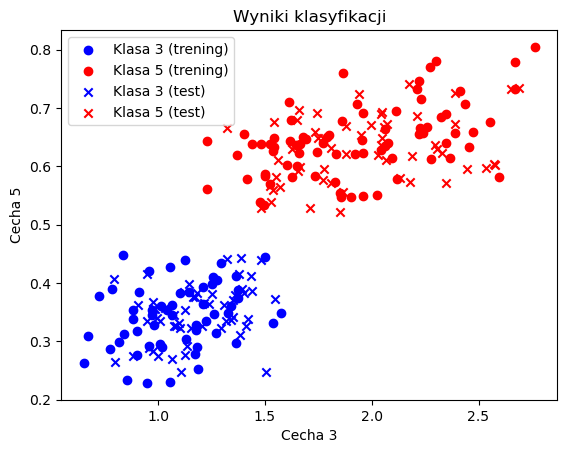

In [41]:
def knn(train_data, test_data, train_labels, features):
    predictions = []
    for test_point in test_data:
        distances = [edist(test_point, train_point, features) for train_point in train_data]
        nearest_index = np.argmin(distances)
        predictions.append(train_labels[nearest_index])
    return predictions

plt.figure()
plt.title("Próbki")
plt.xlabel("Cecha 3")
plt.ylabel("Cecha 5")

train_new_3 = train_new[train_new[:, 0] == 3.0]  
train_new_5 = train_new[train_new[:, 0] == 5.0]  

plt.scatter(train_new_3[:, 3], train_new_3[:, 4], label='Klasa 3 (trening)', c='blue', marker='o')
plt.scatter(train_new_5[:, 3], train_new_5[:, 4], label='Klasa 5 (trening)', c='red', marker='o')

plt.legend()

features = [3, 4] 
res = knn(train_new, test_new, train_new[:, 0], features)

plt.figure()
plt.title("Wyniki klasyfikacji")
plt.xlabel("Cecha 3")
plt.ylabel("Cecha 5")

plt.scatter(train_new_3[:, 3], train_new_3[:, 4], label='Klasa 3 (trening)', c='blue', marker='o')
plt.scatter(train_new_5[:, 3], train_new_5[:, 4], label='Klasa 5 (trening)', c='red', marker='o')

test_new_3 = test_new[test_new[:, 0] == 3.0]
test_new_5 = test_new[test_new[:, 0] == 5.0]

plt.scatter(test_new_3[:, 3], test_new_3[:, 4], label='Klasa 3 (test)', c='blue', marker='x')
plt.scatter(test_new_5[:, 3], test_new_5[:, 4], label='Klasa 5 (test)', c='red', marker='x')

plt.legend()
plt.show()

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [43]:
N = 0
T = 0

for tested_val, c_val in zip(res, test_new[:, 0]):
    N += 1
    if tested_val == c_val:
        T += 1

Acc = T / N
print(f"Dokładność : {Acc:.2f}")

Dokładność (accuracy): 1.00


### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.


Dokładność : 0.62


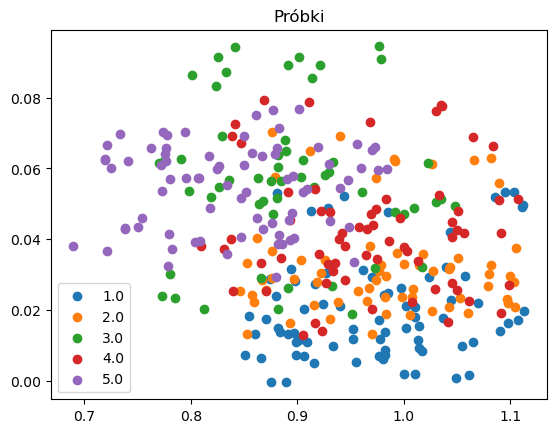

In [47]:
train_new = train[(train[:, 0] == 1.0) | (train[:, 0] == 2.0) | (train[:, 0] == 3.0) | (train[:, 0] == 4.0) | (train[:, 0] == 5.0)]
test_new = test[(test[:, 0] == 1.0) | (test[:, 0] == 2.0) | (test[:, 0] == 3.0) | (test[:, 0] == 4.0) | (test[:, 0] == 5.0)]

plt.figure()
plt.title("Próbki")


s1 = train_new[train_new[:, 0] == 1.0]
s2 = train_new[train_new[:, 0] == 2.0]
s3 = train_new[train_new[:, 0] == 3.0]
s4 = train_new[train_new[:, 0] == 4.0]
s5 = train_new[train_new[:, 0] == 5.0]

ss = [s1, s2, s3, s4, s5]

for sample in ss: 
    plt.scatter(x=sample[:, 5], y=sample[:, 10], label=sample[0][0])

plt.legend()

res = knn(train_new, test_new, train_new[:, 0], [3,4])
N = 0
T = 0

for tested_val, c_val in zip(res, test_new[:, 0]):
    N += 1
    if tested_val == c_val:
        T += 1

Acc = T / N
print(f"Dokładność : {Acc:.2f}")

### Zadanie 10

Przeprowadź eksperyment ponownie dla takich samych parametrów jak w zad. 9, ale większej losowo wybranej liczby cech: 3, 5, 10.

> W tym przypadku nie wyświetlaj wykresu a jedynie oblicz dokładność klasyfikacji.

Dokładność (accuracy) dla 3 cech: 0.67
Dokładność (accuracy) dla 5 cech: 0.71
Dokładność (accuracy) dla 10 cech: 0.76


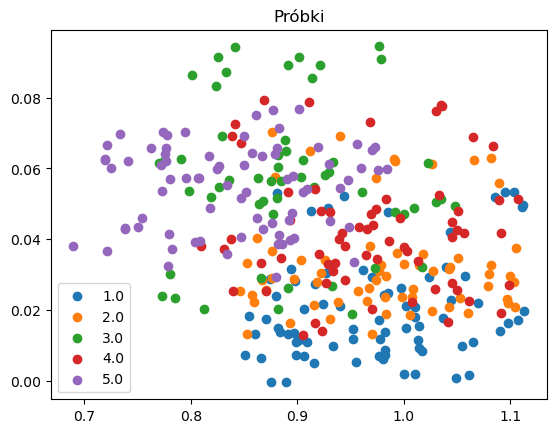

In [48]:
train_new = train[(train[:, 0] == 1.0) | (train[:, 0] == 2.0) | (train[:, 0] == 3.0) | (train[:, 0] == 4.0) | (train[:, 0] == 5.0)]
test_new = test[(test[:, 0] == 1.0) | (test[:, 0] == 2.0) | (test[:, 0] == 3.0) | (test[:, 0] == 4.0) | (test[:, 0] == 5.0)]


plt.figure()
plt.title("Próbki")

s1 = train_new[train_new[:, 0] == 1.0]
s2 = train_new[train_new[:, 0] == 2.0]
s3 = train_new[train_new[:, 0] == 3.0]
s4 = train_new[train_new[:, 0] == 4.0]
s5 = train_new[train_new[:, 0] == 5.0]

ss = [s1, s2, s3, s4, s5]

for sample in ss:
    plt.scatter(x=sample[:, 5], y=sample[:, 10], label=sample[0][0])

plt.legend()


features_3 = [3, 4, 5]  
res_3 = knn(train_new, test_new, train_new[:, 0], features_3)

N_3 = 0
T_3 = 0

for tested_val, c_val in zip(res_3, test_new[:, 0]):
    N_3 += 1
    if tested_val == c_val:
        T_3 += 1

Acc_3 = T_3 / N_3
print(f"Dokładność  dla 3 cech: {Acc_3:.2f}")

features_5 = [3, 4, 5, 6, 7]  
res_5 = knn(train_new, test_new, train_new[:, 0], features_5)

N_5 = 0
T_5 = 0

for tested_val, c_val in zip(res_5, test_new[:, 0]):
    N_5 += 1
    if tested_val == c_val:
        T_5 += 1

Acc_5 = T_5 / N_5
print(f"Dokładność  dla 5 cech: {Acc_5:.2f}")

features_10 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
res_10 = knn(train_new, test_new, train_new[:, 0], features_10)

N_10 = 0
T_10 = 0

for tested_val, c_val in zip(res_10, test_new[:, 0]):
    N_10 += 1
    if tested_val == c_val:
        T_10 += 1

Acc_10 = T_10 / N_10
print(f"Dokładność  dla 10 cech: {Acc_10:.2f}")

### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

In [ ]:
"""
Im więcej cech jest używanych do klasyfikacji, tym więcej informacji ma model, co może prowadzić do lepszego rozróżnienia między klasami. Nie oznacza
to, że zawsze większa liczba użytych cech jest pożądana, ponieważ znacznie zwiększa złożoność obliczeniową. 

"""